# Exercise 1 

**Sigmoid Function**



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  


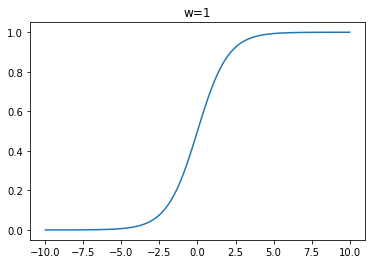

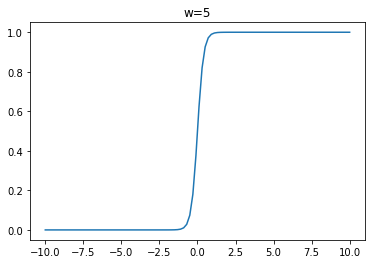

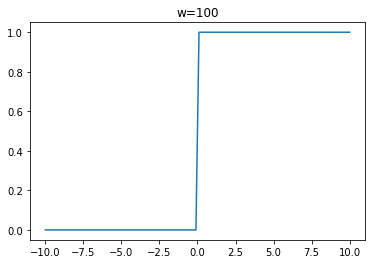

In [311]:
import numpy as np
import matplotlib.pyplot as plt

#define sigmoid function
def sigmoid_func(x,w):
    z = np.exp(-w*x)
    sig = 1 / (1 + z)
    return sig

#store values for x and w
w_values = [1,5,100]
x_values = np.linspace(-10, 10, 100)
# x_values = [] 
# for i in range (-10,11):
#   x_values.append(i)

#plots
for w in w_values:
  sigmoid_values =[]
  for x in x_values:
    sigmoid_values.append(sigmoid_func(x,w))
  plt.figure()
  plt.title('w=' +str(w))
  plt.plot(x_values, sigmoid_values)



For big values of w, the model overfits since |wx| becomes larger. This means that for negative values of x, -wx become "more" positive and y never actually reaches 1 but in every iteration get closer and closer to 1. For positive values of x, -wx becomes "more" negative an y get always closer and closer to 0. And this makes the model to overfit since it "produce" more acurate values of y so we have a large dispersion of forecasts(y values) around the actual value of the dependent variable.

**Regulization**

Certenly a regulization method would help the model to avoid overfiting since its goal is to use a model which fits the data satisfactoraly and in the same time avoid overfiting by trying not to use regression weights that are too large. The two most known regulization methods are Ridge and Lasso regresions. Since, "Lasso tends to do well if there are a small number of significant parameters and the others are close to zero and Ridge works well if there are many large parameters of about the same value." $^1$ , I would choose Lasso if the goal was to reduce the dimensions and/or stabilize data, and Ridge if  all parameters affect the result to the same extent.

This is somehow a theoretical aproach, when we deal with real data is better to run cross-validation to select the more suited model for a specific case.

# Exercise 2

$ \beta^* = argmin[\sum_{i=1}^{N} (Y_i-\beta^Tx_i)^2 + \lambda \sum_{k=1}^{k} \beta_k^2] (1) $

Euclidean distance = l2_norm $||x||_2 = \sqrt{\sum_i(x_i)^2} ⇒ ||x||_2^2 = \sum_i(x_i)^2 (2)$

So from (2) we have (1) $ \Rightarrow argmin[||Y-\beta^Tx||_2^2 + \lambda||\beta||_2^2] $

We eant to calculate the minimum value so we have to find calculate the derivative of $l(\beta)$ and eliminate it.

$$\frac{\partial l(\beta)}{\partial \beta} = \frac{\partial (Y-\beta^TX)^T(Y-\beta^TX)}{\partial \beta} + \lambda \frac{\partial ||\beta||^2_2}{\partial \beta} (3) $$

From cookbook:   $\lambda \frac{\partial ||\beta||^2_2}{\partial \beta} = \lambda \frac{\partial ||\beta^T\beta||^2_2}{\partial \beta}=2\beta$

$(Y-\beta^TX)^T(Y-\beta^TX) = Y^TY-Y^T\beta^TX-X^T\beta\beta^T X  = I$

$\frac{\partial I}{\partial \beta} = \frac{\partial(Y^TY}{\partial \beta}-\frac{\partial Y^T\beta^TX}{\partial \beta} - \frac{\partial Y^T\beta^TY}{\partial \beta} - \frac{\partial X^T\beta\beta^T X}{\partial \beta} $

From cookbook:
$$\frac{\partial(Y^TY}{\partial \beta} = 0 $$
$$ \frac{\partial Y^T\beta^TX}{\partial \beta} = XY^T$$
$$ \frac{\partial Y^T\beta^TY}{\partial \beta} =XY^T $$
$$\frac{\partial X^T\beta\beta^T X}{\partial \beta} =2XX^T\beta$$
So,
$$\frac{\partial l(\beta)}{\partial \beta} = 2X(X^T \beta-Y^T)+2\lambda\beta$$
$$⇒ X(X^T\beta - Y^T)+\lambda\beta = 0$$
$$ XX^T\beta-XX^T+\lambda\beta = 0 $$
$$ \beta(\lambda +XX^T) = XY^T$$
$$\beta = \frac{XY^T}{I\lambda+XX^T}  $$

The important argument here is $\lambda$ since it affects the normalization in order to avoid over\under fitting.

So, for $\lambda =0$ $\lambda \sum_k=1^k \beta_k^2 = 0$ so it does not effect at all.

The problem remains on the values of $\sum_{i=1}^{N} (Y_i-\beta^Tx_i)^2$ = RSS.

$\lambda < 0$ The normalization problem impose a reduction to RSS values, so  we have greater values for $\sum_k=1^k \beta_k^2$ that means $\beta_k$ will be greater than 0 and that lead to overfiting.

$\lambda > 0$ means that all the values $\lambda \sum_{k=1}^{k} \beta_k^2$ will be greater than 0, so the term is reversible and there is a unique solution.

# Exercise 3


Unzip images

In [312]:
# Import important libraries
import os
import numpy as np
import matplotlib.cm as cm
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from numpy.linalg import eig
import glob
from os import path
import pandas as pd
%matplotlib inline

In [313]:
import zipfile
with zipfile.ZipFile("/content/faces.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

I. LOADING AND SAVING DATA

Define sets

In [314]:
sets = []

set_1 = [] 
for i in range(1,8):
  set_1.append('0'+str(i))
sets.append(set_1)

set_2 = [] 
for i in range(8,20):
  if i<10:
    set_2.append('0'+str(i))
  else:
    set_2.append(str(i))
sets.append(set_2)

set_3 = [] 
for i in range(20,32):
  set_3.append(str(i))
sets.append(set_3)

set_4 = [] 
for i in range(32,46):
  set_4.append(str(i))
sets.append(set_4)

set_5 = [] 
for i in range(47,64):
  set_5.append(str(i))
sets.append(set_5)
  
print(sets)

[['01', '02', '03', '04', '05', '06', '07'], ['08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19'], ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'], ['32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45'], ['47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63']]


Define function to load the images from files

In [315]:
def loadImages(PATH,set_):
  files = glob.glob(PATH)
  images =[]
  images_index = []
  for image in files:
      # print(image)
      #keeping labels
      p1 = image.split('n')
      name = p1[1].split('_')
      # images_index.append(name[0])
      if(name[1].split('.')[0] in set_):
        images_index.append(name[0])
        im = Image.open(image)
        images.append(np.asarray(im))
  print(images[0].shape) #each image is 50x50 dimensions
  return images ,images_index

In [316]:
image_path = 'faces'
image_format = '*.png'
PATH = path.join(image_path,image_format)

sets_df = []
for s in sets:
  images,images_index  = loadImages(PATH,s)
  #flatten images
  flattened_images = []
  for i in range(0, len(images)):
      flattened_images.append(np.reshape(images[i],(images[0].shape[0] * images[0].shape[1])))
  #convert to dataframe
  data = {'vectors(image)':flattened_images,
          'label(person)':images_index}
  df = pd.DataFrame(data)
  print(df)
  sets_df.append(df)

#at this point we have a list with pandas dataframes for each set of images

(50, 50)
                                       vectors(image) label(person)
0   [102, 91, 97, 105, 97, 104, 116, 126, 112, 131...            08
1   [44, 19, 8, 12, 10, 16, 18, 15, 36, 14, 15, 21...            06
2   [33, 46, 62, 70, 76, 72, 78, 73, 52, 39, 44, 3...            02
3   [21, 31, 11, 15, 74, 56, 35, 26, 72, 58, 91, 9...            05
4   [12, 10, 10, 13, 15, 9, 6, 15, 19, 14, 24, 49,...            09
..                                                ...           ...
65  [43, 52, 59, 74, 84, 85, 90, 90, 82, 57, 38, 5...            02
66  [82, 29, 19, 24, 36, 31, 48, 43, 43, 19, 24, 3...            06
67  [61, 25, 17, 17, 27, 35, 34, 34, 46, 20, 29, 3...            06
68  [22, 27, 42, 50, 59, 57, 63, 58, 48, 35, 28, 2...            02
69  [141, 131, 126, 134, 156, 158, 163, 171, 166, ...            03

[70 rows x 2 columns]
(50, 50)
                                        vectors(image) label(person)
0    [138, 145, 142, 125, 137, 137, 141, 145, 137, ...            10
1    

Data visualization

In [317]:
def plot_faces(pixels,h,w):
    fig, axes = plt.subplots(5, 5, figsize=(6, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(h, w), cmap='gray')
    plt.show()
# plot_faces(set_1['vectors(image)'],50,50)
# for sett in sets_df:
#   plot_faces(sett['vectors(image)'],50,50)

II.EIGENFACE METHOD IMPLEMENTATION

In [318]:
#get the training data
original_set_1 = sets_df[0] #set_1
set_1 = original_set_1.copy()
set_1
#get evaluation data
original_set_2 = sets_df[1] #set_2
set_2 = original_set_2.copy()
original_set_3 = sets_df[2] #set_3
set_3 = original_set_3.copy()
original_set_4 = sets_df[3] #set_4
set_4 = original_set_4.copy()
original_set_5 = sets_df[4] #set_5
set_5 = original_set_5.copy()

In [319]:
set_1

,vectors(image),label(person)
0,"[102, 91, 97, 105, 97, 104, 116, 126, 112, 131...",08
1,"[44, 19, 8, 12, 10, 16, 18, 15, 36, 14, 15, 21...",06
2,"[33, 46, 62, 70, 76, 72, 78, 73, 52, 39, 44, 3...",02
3,"[21, 31, 11, 15, 74, 56, 35, 26, 72, 58, 91, 9...",05
4,"[12, 10, 10, 13, 15, 9, 6, 15, 19, 14, 24, 49,...",09
...,...,...
65,"[43, 52, 59, 74, 84, 85, 90, 90, 82, 57, 38, 5...",02
66,"[82, 29, 19, 24, 36, 31, 48, 43, 43, 19, 24, 3...",06
67,"[61, 25, 17, 17, 27, 35, 34, 34, 46, 20, 29, 3...",06
68,"[22, 27, 42, 50, 59, 57, 63, 58, 48, 35, 28, 2...",02


Preprocess the data

In [320]:
#zscore
from scipy import stats
def preproces(set_):
  #mean of each image
  count = 0
  for image in set_["vectors(image)"]:
    new_image = stats.zscore(image)
    set_.iat[count, set_.columns.get_loc('vectors(image)')] = new_image #save 
    count +=1

#preprocess training data
preproces(set_1)
# #preprocess test data
preproces(set_2)
preproces(set_3)
preproces(set_4)
preproces(set_5)


#mean of all
# print("mean of all images")
# ar = []
# for image in set_1["vectors(image)"]:
#   ar.append(image)
# print( stats.zscore(ar, axis=1, ddof=1))


Seperate vectors and labels of training data

In [321]:
#get train labels and vectors
X_train = []
Y_train = [] 
Y_train = set_1['label(person)'] 

for image in set_1['vectors(image)']:
  X_train.append(image)


PCA

In [322]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train) #all components
pca_9=PCA(n_components=9).fit(X_train) #d=9 principal components
X_train_9 = pca_9.transform(X_train)
pca_30=PCA(n_components=30).fit(X_train) #d=30 principal components
X_train_30 = pca_30.transform(X_train)


TRAINING

In [323]:
#KNN(1)
from sklearn.neighbors import KNeighborsClassifier
#train for d=9
KNN_9 = KNeighborsClassifier(n_neighbors=1)
trained_9 = KNN_9.fit(X_train_9, Y_train)
#train for d=30
KNN_30 = KNeighborsClassifier(n_neighbors=1)
trained_30 = KNN_30.fit(X_train_30, Y_train)

EVALUATE

In [324]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#predict set_1 labels for d=9
preds_9 = trained_9.predict(X_train_9)
print(classification_report(Y_train, preds_9))
print(accuracy_score(Y_train,preds_9))

#predict set_1 labels for d=30
preds_30 = trained_30.predict(X_train_30)
print(classification_report(Y_train, preds_30))
print(accuracy_score(Y_train,preds_9))


              precision    recall  f1-score   support

          01       1.00      1.00      1.00         7
          02       1.00      1.00      1.00         7
          03       1.00      1.00      1.00         7
          04       1.00      1.00      1.00         7
          05       1.00      1.00      1.00         7
          06       1.00      1.00      1.00         7
          07       1.00      1.00      1.00         7
          08       1.00      1.00      1.00         7
          09       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         7

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70

1.0
              precision    recall  f1-score   support

          01       1.00      1.00      1.00         7
          02       1.00      1.00      1.00         7
          03       1.00      1.00      1.00         7
          04       1

As one can see the accuracy for set 1 is 1.0 (100%) for both cases (d=9 and d=30) since set_1 is used both for the training and for the evaluation procces.

In [325]:
#definition of a evaluation method used for the rest of the sets
def evaluate(eval_data, trained_data,n_componenets):
  #get evaluation labels and vectors
  X_eval = []
  Y_eval = [] 
  Y_eval = eval_data['label(person)'] 
  for image in eval_data['vectors(image)']:
    X_eval.append(image)
  if n_componenets == 30:
    X_eval = pca_30.transform(X_eval)
  elif n_componenets ==9:
    X_eval = pca_9.transform(X_eval)

  preds = trained_data.predict(X_eval)
  print(classification_report(Y_eval, preds))
  print(accuracy_score(Y_eval,preds))

Evaluation for set_2-5 for d=9

In [326]:
print("9 COMPONENTS evaluation of sets 2, 3, 4, 5")
for s in range(1,5):
  print("SETS_"+str(s+1))
  evaluate(sets_df[s],trained_9,9)
  print("\n")

9 COMPONENTS evaluation of sets 2, 3, 4, 5
SETS_2
              precision    recall  f1-score   support

          01       1.00      1.00      1.00        12
          02       1.00      1.00      1.00        12
          03       1.00      1.00      1.00        12
          04       1.00      1.00      1.00        12
          05       1.00      1.00      1.00        12
          06       1.00      1.00      1.00        12
          07       1.00      1.00      1.00        12
          08       0.85      0.92      0.88        12
          09       1.00      1.00      1.00        12
          10       0.91      0.83      0.87        12

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120

0.975


SETS_3
              precision    recall  f1-score   support

          01       1.00      0.75      0.86        12
          02       0.91      0.83      0.87        12
          03 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Evaluation for set_2-5 for d=30

In [327]:
print("30 COMPONENTS evaluation of sets 2, 3, 4, 5")
for s in range(1,5):
  print("SETS_"+str(s+1))
  evaluate(sets_df[s],trained_30,30)
  print("\n")

30 COMPONENTS evaluation of sets 2, 3, 4, 5
SETS_2
              precision    recall  f1-score   support

          01       1.00      1.00      1.00        12
          02       1.00      1.00      1.00        12
          03       1.00      1.00      1.00        12
          04       1.00      1.00      1.00        12
          05       1.00      1.00      1.00        12
          06       1.00      1.00      1.00        12
          07       1.00      1.00      1.00        12
          08       1.00      1.00      1.00        12
          09       1.00      1.00      1.00        12
          10       1.00      1.00      1.00        12

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

1.0


SETS_3
              precision    recall  f1-score   support

          01       1.00      1.00      1.00        12
          02       1.00      1.00      1.00        12
          03  

As mentioned above for set_1 we get 100% accuracy since the model has seen the evaluation data in the training procces. For the rest of the sets the accuracy decreases as it is expected. What is important to mention is that the accuracy score gap betwwen d=9 and d=30 is not. The model perform aroun 5% better for d=30 which leads to the conclusion that 9 top eigenvectors are the most crucial and are more than enough to train a model. 

III. 9 TOP eigenvectors

[]

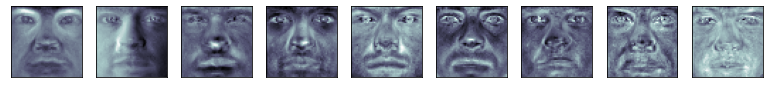

In [328]:
plt.subplots(figsize=(15, 15))
for c in range(1,10):
  plt.subplot(1, 10, c)
  plt.imshow(pca_9.components_[c-1].reshape(50, 50), cmap='bone')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])


IV. Eigenfaces for random image

I have chose the same "random" image for each implementation (original,d=9 and d=30) for the same set corespondingly, but different image for each set.

In [329]:
#create dataframes that stores only vectors not labels
images_df = []
for s in range(1,6):
  #get vectors as df
  im_arr = [] 
  for i in sets_df[s-1]["vectors(image)"]:
    im_arr.append(i)
  images = pd.DataFrame(im_arr) 
  images_df.append(images)

Original

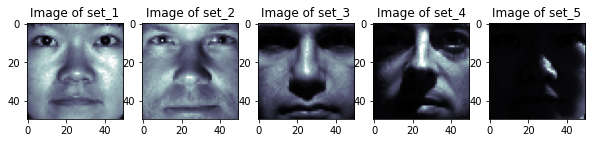

In [330]:
plt.figure(figsize=(10, 5))
for s in range(1,6):
  original_im = sets_df[s-1]["vectors(image)"][s+2]
  plt.subplot(1, 5, s).set_title('Image of set_'+str(s))
  plt.imshow(original_im.reshape(50,50), cmap='bone')

d=9

[]

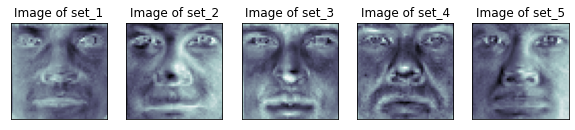

In [331]:
plt.figure(figsize=(10, 5))
for s in range(1,6):
  # choose a random image from set
  rand_img = images_df[s-1].iloc[s+2]
  rand_img = rand_img.to_frame(name='col')
  rand_img = pca_9.transform(rand_img.T)
  rand_img = pca_9.inverse_transform(rand_img)

  plt.subplot(1, 5, s).set_title('Image of set_'+str(s))
  plt.imshow(rand_img.reshape(50,50), cmap='bone')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

d=30

[]

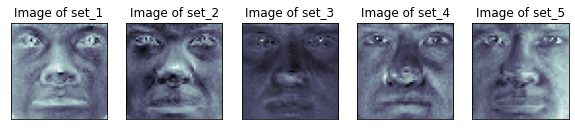

In [332]:
plt.figure(figsize=(10, 5))
for s in range(1,6):
  # choose a random image from set
  rand_img = images_df[s-1].iloc[s+2]
  rand_img = rand_img.to_frame(name='col')
  rand_img = pca_30.transform(rand_img.T)
  rand_img = pca_30.inverse_transform(rand_img)

  plt.subplot(1, 5, s).set_title('Image of set_'+str(s))
  plt.imshow(rand_img.reshape(50,50), cmap='bone')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

As on part II what we observe is that the number of components do not play a very important role. In the case of the 30c omponenets the images are slighlty clearer but there is no significant diffference, the 9 componenets are enough to "extract the significant information" from the images. Of course the analysis in the original images is superior since we are using all "the information" to depict the image. In general when we perform PCA we reduce the dimensionality so some information is lost. 

V. 9 singular vectors after performing SVD on set_1

[]

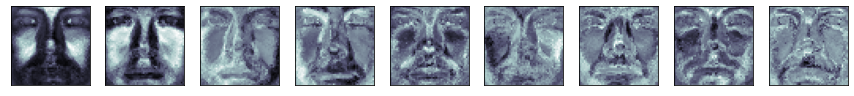

In [333]:
#perforn SVD on set_1
u, s, vh = np.linalg.svd(images_df[0], full_matrices=0)
#plot vectors
plt.figure(figsize=(15, 15))
for i in range(1,10):
  plt.subplot(1, 9, i)
  plt.imshow(vh[i-1].reshape(50,50), cmap='bone')

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

[]

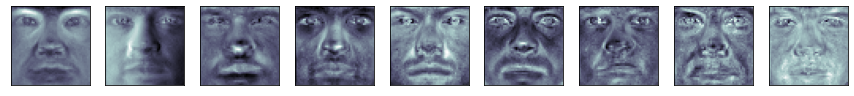

In [334]:
#ploting again Eeigenfaces to compare with singular vectors
plt.subplots(figsize=(15, 15))
for c in range(1,10):
  plt.subplot(1, 9, c)
  plt.imshow(pca_9.components_[c-1].reshape(50, 50), cmap='bone')
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])

Comments

Since SVD gives the whole nine-yard of diagonalizing a matrix into special matrices (that are easy to manipulate and to analyze), while PCA skips less significant components, its obvious that the images will differ.This can be seen clearly in the images above.

SVD = $(U*S*V^{T})$  where  $U = A^{T}A$  and  $V= AA^{T}$.

PCA =$(A−λI)X=0$ 

COMMENTS FOR EXERCISE 3

It was recommended to pre-edit each image by subtracting its average value and dividing by the standard deviation of its values. For this step (preproces) I used the zscore() function of spicy library which compute the z score of each value in the sample, relative to the sample mean and standard deviation. I also tried to implement all this procces by myself(you can see a sample code below) but since using the zscore() function "made things" easier and the code clearer I ended up using the function.

Below you can find some references for the implementation of the project:

https://pythonmachinelearning.pro/face-recognition-with-eigenfaces/

https://towardsdatascience.com/an-attempt-to-fine-tune-facial-recognition-eigenfaces-a6baa8fc0e62

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.zscore.html

https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html

https://jonathan-hui.medium.com/machine-learning-singular-value-decomposition-svd-principal-component-analysis-pca-1d45e885e491#:~:text=What%20is%20the%20difference%20between,PCA%20skips%20less%20significant%20components.

Sample code for the preproces step

In [335]:
#Each image is substracted by its mean and devided by its standart derivation
import statistics
def preproces(set_):
  count = 0
  for image in set_["vectors(image)"]:
    mean_value = np.mean(image) #calculate mean
    new_image = np.zeros(2500)
    new_image = (image - mean_value) #create new image
    derivation = statistics.stdev(new_image) #calculate standart derivation
    new_image = (new_image - mean_value)/derivation #create new image

    set_.iat[count, set_.columns.get_loc('vectors(image)')] = new_image #save 
    count +=1
    
preproces(set_1)
set_1

,vectors(image),label(person)
0,"[0.13475611683647815, -0.13156031959924963, 0....",08
1,"[-1.438914779066731, -2.09035644694071, -2.376...",06
2,"[-2.4094589017445918, -2.0551635826750867, -1....",02
3,"[-2.6849257437325824, -2.462291392936335, -2.9...",05
4,"[-1.9774214104571135, -2.0246073557754873, -2....",09
...,...,...
65,"[-2.1329644842090434, -1.8958150151959863, -1....",02
66,"[-0.9240831415814126, -2.0639175882350824, -2....",06
67,"[-1.3633490430893573, -2.253728512191602, -2.4...",06
68,"[-2.471308942314544, -2.3280811892594073, -1.8...",02


In [336]:
#Each image is substracted by the mean of all faces and devided by its standart derivation
def preproces1(set_):
    
  faces = [] 
  for image in set_['vectors(image)']:
    faces.append(image)

  mean_face = np.mean( faces,axis=0)

  # Subtract average_face_vector from every image vector.
  count=0
  for image in set_["vectors(image)"]:
    new_image = np.zeros(2500)
    new_image = (image - mean_face) #create new image
    derivation = statistics.stdev(new_image) #calculate standart derivation
    new_image = (new_image - mean_face)/derivation #create new image

    set_.iat[count, set_.columns.get_loc('vectors(image)')] = new_image #save 
    count +=1


preproces1(set_1)
set_1

,vectors(image),label(person)
0,"[4.348507099592702, 3.938500292725703, 3.99967...",08
1,"[2.041387413760706, 1.015474754290848, 0.40406...",06
2,"[0.47337496413440977, 0.964819849273014, 1.431...",02
3,"[0.09385825949052434, 0.42981448458532256, -0....",05
4,"[1.3982635250063242, 1.3027915479123429, 1.112...",09
...,...,...
65,"[0.7994941091301072, 1.1020750517826994, 1.206...",02
66,"[2.5723605019840576, 0.9552844866818565, 0.503...",06
67,"[1.9729603819971724, 0.6946037285825448, 0.262...",06
68,"[0.3865620343075867, 0.5809530297373452, 1.038...",02
